# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.utils import requote_uri

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
#Save config Information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

url = base_url + f"appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# counter for City Index
count=1 
# Counter for number of sets to be created
sets =1 

#Intializing the lists to hold values
max_temp = []
city_name = []
city_lat = []
city_lng = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
country = []
city_date = []

print("Beginning Data Retrieval\n -----------------------------")

for city in cities:
    
    # Build Final query URL 
    final_url = requote_uri(f"{url}{city}") 
    

    #Make API calls to each city
    response = requests.get(final_url).json()
    #print(final_url)

    print(f'Processing Record {count} of Set {sets} | {city}')

    #Since some data may be missing , use try-except to skip any that are missing a data point.
    try:       
        #Fetching 'weather data' from the 'json resonse' 
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_cloudiness.append(response['clouds']['all'])
        city_windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])                      
        
    except KeyError:
        print("City not found. Skipping...")
            
    count+=1  #increment city index after missing cities
    
    #Set counter for number of sets to return
    if count % 50 == 0:
        sets+=1
        
#Printing end of processing
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')   

Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | okhotsk
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | bela
Processing Record 13 of Set 1 | kopavogur
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | dunedin
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | port blair
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Se

Processing Record 184 of Set 4 | belawan
Processing Record 185 of Set 4 | saldanha
Processing Record 186 of Set 4 | urumqi
Processing Record 187 of Set 4 | vanavara
Processing Record 188 of Set 4 | allada
Processing Record 189 of Set 4 | maralal
Processing Record 190 of Set 4 | rocha
Processing Record 191 of Set 4 | roald
Processing Record 192 of Set 4 | marawi
Processing Record 193 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 194 of Set 4 | saskylakh
Processing Record 195 of Set 4 | souillac
Processing Record 196 of Set 4 | baculin
Processing Record 197 of Set 4 | bacolod
Processing Record 198 of Set 4 | la ronge
Processing Record 199 of Set 4 | turayf
Processing Record 200 of Set 5 | bengkulu
Processing Record 201 of Set 5 | tunduru
City not found. Skipping...
Processing Record 202 of Set 5 | otradnoye
Processing Record 203 of Set 5 | santa maria del oro
Processing Record 204 of Set 5 | paamiut
Processing Record 205 of Set 5 | constitucion
Processing Re

Processing Record 370 of Set 8 | port hedland
Processing Record 371 of Set 8 | bairiki
Processing Record 372 of Set 8 | westport
Processing Record 373 of Set 8 | aswan
Processing Record 374 of Set 8 | sisimiut
Processing Record 375 of Set 8 | kieta
Processing Record 376 of Set 8 | manitouwadge
Processing Record 377 of Set 8 | norman wells
Processing Record 378 of Set 8 | mao
Processing Record 379 of Set 8 | bjornevatn
Processing Record 380 of Set 8 | horki
Processing Record 381 of Set 8 | bilibino
Processing Record 382 of Set 8 | vardo
Processing Record 383 of Set 8 | padang
Processing Record 384 of Set 8 | lakatoro
Processing Record 385 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 386 of Set 8 | maniitsoq
Processing Record 387 of Set 8 | lompoc
Processing Record 388 of Set 8 | lisakovsk
Processing Record 389 of Set 8 | sioux lookout
Processing Record 390 of Set 8 | mabaruma
Processing Record 391 of Set 8 | seoul
Processing Record 392 of Set 8 | mount isa
Processin

Processing Record 554 of Set 12 | santa luzia
Processing Record 555 of Set 12 | udomlya
Processing Record 556 of Set 12 | azad shahr
Processing Record 557 of Set 12 | muros
Processing Record 558 of Set 12 | yinchuan
Processing Record 559 of Set 12 | muscat
Processing Record 560 of Set 12 | atasu
Processing Record 561 of Set 12 | lac du bonnet
Processing Record 562 of Set 12 | korla
Processing Record 563 of Set 12 | ayia galini
Processing Record 564 of Set 12 | whitehorse
Processing Record 565 of Set 12 | pringsewu
Processing Record 566 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 567 of Set 12 | bradley
Processing Record 568 of Set 12 | yeppoon
Processing Record 569 of Set 12 | shambu
Processing Record 570 of Set 12 | sakaiminato
Processing Record 571 of Set 12 | lashio
Processing Record 572 of Set 12 | maunabo
Processing Record 573 of Set 12 | salalah
Processing Record 574 of Set 12 | launceston
Processing Record 575 of Set 12 | teguldet
Processing Record 576 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({
                            "City":city_name,
                            "Lat":city_lat,
                            "Lng":city_lng,
                            "Max Temp(F)":max_temp,
                            "Humidity":city_humidity,
                            "Cloudiness":city_cloudiness,
                            "Wind Speed":city_windspeed,
                            "Country":country,
                            "Date":city_date
                            })

#Save data in .csv file format
city_data.to_csv("Output_data/Airport_Output.csv" , index=False , encoding="utf-8")

#Displaying the Data
city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-34.01,67,1,2.26,CA,1612648485
1,Butaritari,3.0707,172.7902,81.25,80,100,21.36,KI,1612648544
2,Jamestown,42.0970,-79.2353,21.20,49,1,17.27,US,1612648757
3,Hermanus,-34.4187,19.2345,66.99,90,84,3.65,ZA,1612648757
4,Faanui,-16.4833,-151.7500,82.04,67,2,10.71,PF,1612648757
...,...,...,...,...,...,...,...,...,...
555,Kismayo,-0.3582,42.5454,76.50,85,24,14.00,SO,1612648764
556,Petropavlovskaya,45.0819,40.4512,29.71,99,100,4.34,RU,1612648891
557,Marshall,34.3834,-86.3333,44.01,87,75,9.22,US,1612648891
558,Humen,22.8190,113.6731,68.00,77,0,4.47,CN,1612648648


In [6]:
#Statistical Analysis of city data
round(city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,560.00,560.00,560.00,560.00,560.00,560.00,5.600000e+02
mean,19.91,23.96,49.92,73.05,49.19,8.42,1.612649e+09
std,33.12,92.08,32.59,19.84,40.52,5.95,1.750100e+02
min,-54.80,-175.20,-36.92,7.00,0.00,0.34,1.612648e+09
25%,-8.54,-60.83,29.72,63.00,1.00,3.88,1.612649e+09
50%,22.91,30.81,61.44,79.00,40.00,6.96,1.612649e+09
75%,47.04,106.43,76.54,87.00,90.00,11.50,1.612649e+09
max,78.22,179.32,95.09,100.00,100.00,34.52,1.612649e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Finding rows with humity value greater than 100
Humidity_over100_df = city_data[city_data['Humidity']>100]
Humidity_over100_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date


##### Note: There are no cities with Humidy greater than 100%

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Only if there are cities with humidy > 100%
index = Humidity_over100_df.index
index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index , inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-34.01,67,1,2.26,CA,1612648485
1,Butaritari,3.0707,172.7902,81.25,80,100,21.36,KI,1612648544
2,Jamestown,42.0970,-79.2353,21.20,49,1,17.27,US,1612648757
3,Hermanus,-34.4187,19.2345,66.99,90,84,3.65,ZA,1612648757
4,Faanui,-16.4833,-151.7500,82.04,67,2,10.71,PF,1612648757
...,...,...,...,...,...,...,...,...,...
555,Kismayo,-0.3582,42.5454,76.50,85,24,14.00,SO,1612648764
556,Petropavlovskaya,45.0819,40.4512,29.71,99,100,4.34,RU,1612648891
557,Marshall,34.3834,-86.3333,44.01,87,75,9.22,US,1612648891
558,Humen,22.8190,113.6731,68.00,77,0,4.47,CN,1612648648


In [10]:
#Statistical Analysis of dropped data set (in case there are outliers)
round(clean_city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,560.00,560.00,560.00,560.00,560.00,560.00,5.600000e+02
mean,19.91,23.96,49.92,73.05,49.19,8.42,1.612649e+09
std,33.12,92.08,32.59,19.84,40.52,5.95,1.750100e+02
min,-54.80,-175.20,-36.92,7.00,0.00,0.34,1.612648e+09
25%,-8.54,-60.83,29.72,63.00,1.00,3.88,1.612649e+09
50%,22.91,30.81,61.44,79.00,40.00,6.96,1.612649e+09
75%,47.04,106.43,76.54,87.00,90.00,11.50,1.612649e+09
max,78.22,179.32,95.09,100.00,100.00,34.52,1.612649e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

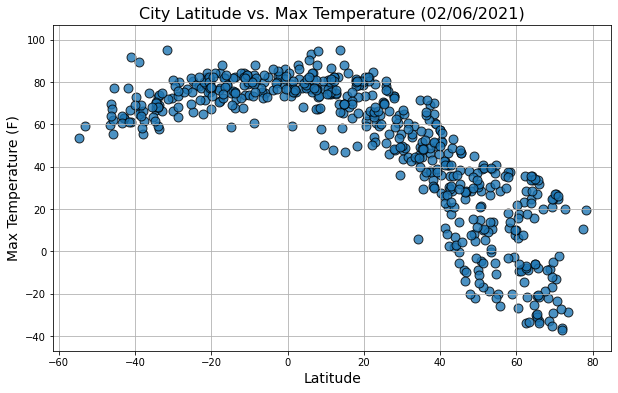

<Figure size 432x288 with 0 Axes>

In [11]:
# Function to Plot Scatter 
def Scatterplot(x,y,title,ylabel,i,j):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=.8, s=80, edgecolor="black")
    plt.grid()
    plt.xlabel("Latitude" , fontsize = 14)
    plt.ylabel(ylabel , fontsize = 14)
    plt.title(title , fontsize = 16)
    plt.ylim(min(y)-i,max(y)+j)
    plt.show()
    plt.tight_layout()
    
    

#Set current date for the title
date = time.strftime("%m/%d/%Y")   

#Set X-Axis and Y-axis for plotting    
x_axis = clean_city_data["Lat"]
y_axis_temp = clean_city_data["Max Temp(F)"]

#Set Title
title = f"City Latitude vs. Max Temperature ({date})"
y_label_T = "Max Temperature (F)"

#Set ylim minimum
ymin = 10
ymax = 12

#Call the function for plotting
scatterplot_Lat_Temp =  Scatterplot(x_axis,y_axis_temp ,title,y_label_T,ymin,ymax)   

#Save as png file
plt.savefig("Images/CityLatVsTemp.png")

## Latitude vs. Humidity Plot

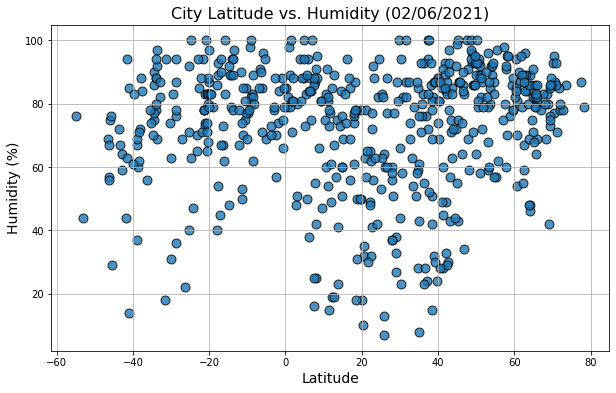

<Figure size 432x288 with 0 Axes>

In [12]:
#Since X-Axis is already set, get Y-axis values for plotting  
y_axis_Humidity = clean_city_data["Humidity"]

#Set Title and Label
title_H = f"City Latitude vs. Humidity ({date})"
y_label_H = "Humidity (%)"

#Set ylim minimum
ymin_H = 5
ymax_H = 5

#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_Humidity , title_H, y_label_H, ymin_H, ymax_H)  

#Save as png file
plt.savefig("Images/CityLatVsHumidity.png")

## Latitude vs. Cloudiness Plot

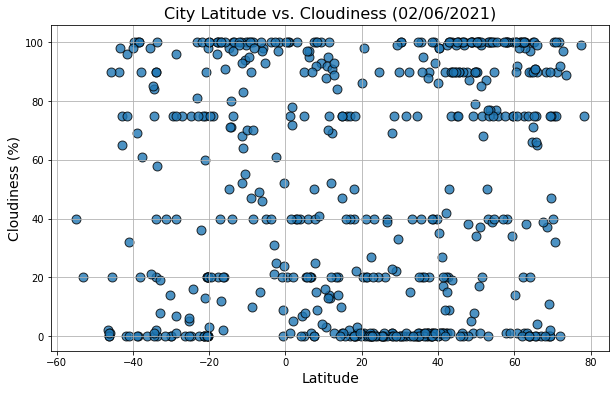

<Figure size 432x288 with 0 Axes>

In [13]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_cloud = clean_city_data["Cloudiness"]

#Set Title and Label
title_C = f"City Latitude vs. Cloudiness ({date})"
y_label_C= "Cloudiness (%)"

#Set ylim minimum
ymin_C = 5
ymax_C = 6

#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_cloud , title_C, y_label_C, ymin_C, ymax_C)  

#Save as png file
plt.savefig("Images/CityLatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

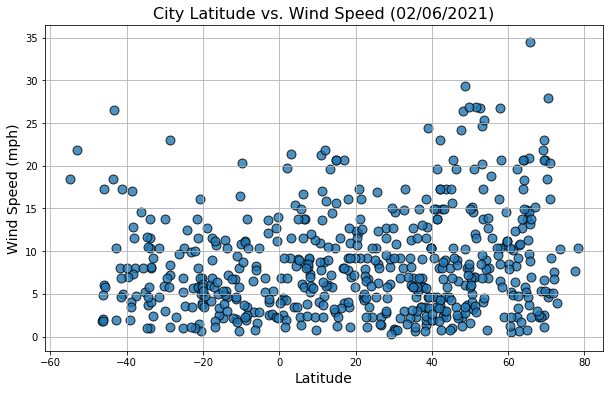

<Figure size 432x288 with 0 Axes>

In [14]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_wind = clean_city_data["Wind Speed"]

#Set Title and Label
title_W = f"City Latitude vs. Wind Speed ({date})"
y_label_W= "Wind Speed (mph)"

#Set ylim minimum
ymin_W = 2
ymax_W = 2

#Call the function for plotting
scatterplot_Lat_Wind =  Scatterplot(x_axis, y_axis_wind , title_W, y_label_W, ymin_W, ymax_W)  

#Save as png file
plt.savefig("Images/CityLatVsWindSpeed.png")

## Linear Regression

##### Note:Creating a dataset for Northern Hemisphere

In [15]:
#Find data for Northern Hemisphere
Northern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]>=0 , :]

#Northern Hemisphere Temperature data points
Northern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-34.01,67,1,2.26,CA,1612648485
1,Butaritari,3.0707,172.7902,81.25,80,100,21.36,KI,1612648544
2,Jamestown,42.0970,-79.2353,21.20,49,1,17.27,US,1612648757
7,Okhotsk,59.3833,143.3000,-2.61,86,34,14.56,RU,1612648344
9,Bela,25.9333,81.9833,51.13,64,0,6.24,IN,1612648758
...,...,...,...,...,...,...,...,...,...
554,Bubaque,11.2833,-15.8333,81.23,54,70,17.05,GW,1612648347
556,Petropavlovskaya,45.0819,40.4512,29.71,99,100,4.34,RU,1612648891
557,Marshall,34.3834,-86.3333,44.01,87,75,9.22,US,1612648891
558,Humen,22.8190,113.6731,68.00,77,0,4.47,CN,1612648648


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Function to calculate Linar regression values:

In [16]:
#Calculate and Run Linear Regression 
def linarequation(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return rvalue , line_eq , regress_values

##### Note: Function to plot scatter with LR equation

In [17]:
#Scatter plot with LR equation
#Arguments ymin and ymax sets y limit and lmin and lmax set LR annotation on the plot
def LR_Scatterplot(x, y, reg_value,line_eq, title, ylabel, ymin, ymax, lmin, lmax):
    plt.figure(figsize=(10,6))
    plt.scatter(x,y , alpha=.8, s=80, edgecolor="black")
    plt.plot(x,reg_value,"r-")
    plt.annotate(line_eq,(lmin,max(y)+lmax),fontsize=20,color="red")
    plt.title(title, fontsize = 16 , color ='black')
    plt.ylim(min(y) -ymin, max(y) +ymax)
    plt.xlabel("Latitude" , fontsize = 14 ,color ='black')
    plt.ylabel(ylabel , fontsize = 14 , color ='black')
    plt.show()
    plt.tight_layout()

In [18]:
# Find X_Axis and Y_Axis values
x_axis_northern = Northern_hemisphere_df['Lat']
y_axis_northern = Northern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_NT , line_eq_NT, regress_values_NT= linarequation(x_axis_northern,y_axis_northern)

#Print values to display
print(f'Linear R Equation : {line_eq_NT}')
print(f"The r-value is: {round(rvalue_NT**2,2)}")

Linear R Equation : y = -1.4x + 92.41
The r-value is: 0.73


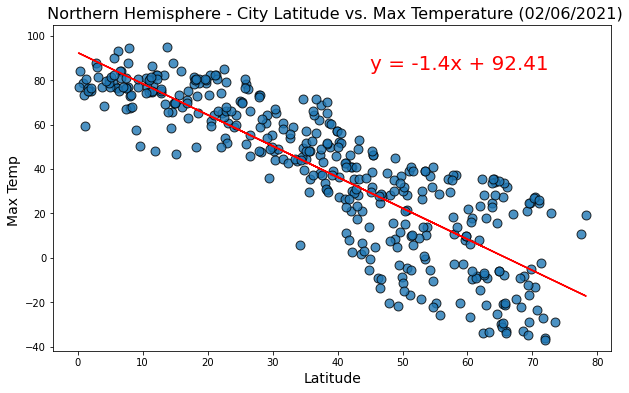

<Figure size 432x288 with 0 Axes>

In [19]:
#plotting scatter Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#Set Title and Label for the pLot    
title_NT = f" Northern Hemisphere - City Latitude vs. Max Temperature ({date})"
ylabel_NT = "Max Temp "

#Set ylim minimum
ymin_NT = 5
ymax_NT = 10

#set annotation limit
lmin_NT =45
lmax_NT =-10

#Call the function for plotting
scatterplot_NH_Temp =  LR_Scatterplot(x_axis_northern, 
                                      y_axis_northern , 
                                      regress_values_NT, 
                                      line_eq_NT,
                                      title_NT, 
                                      ylabel_NT, 
                                      ymin_NT, ymax_NT,
                                      lmin_NT,lmax_NT)  

#Save as png file
plt.savefig("Images/NorthHem_LatVsTemp_LR.png")

#### Analysis : The r-value: 0.75 
         - Shows that there is a strong positive correlation between Temperature and Latitude on the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Note:Creating a dataset for Southern Hemisphere

In [20]:
#Find data for Southern Hemisphere
Southern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]<0 , :]

#Southern Hemisphere Temperature data points
Southern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
3,Hermanus,-34.4187,19.2345,66.99,90,84,3.65,ZA,1612648757
4,Faanui,-16.4833,-151.7500,82.04,67,2,10.71,PF,1612648757
5,Ushuaia,-54.8000,-68.3000,53.60,76,40,18.41,AR,1612648757
6,Bluff,-46.6000,168.3333,59.63,69,2,1.77,NZ,1612648757
8,Busselton,-33.6500,115.3333,57.99,97,100,4.00,AU,1612648758
...,...,...,...,...,...,...,...,...,...
529,Isangel,-19.5500,169.2667,82.40,83,20,4.72,VU,1612648885
530,Charters Towers,-20.1000,146.2667,77.83,79,100,5.37,AU,1612648885
532,Mocuba,-16.8392,36.9856,74.57,94,100,1.14,MZ,1612648886
542,Cobija,-11.0267,-68.7692,82.11,85,64,1.72,BO,1612648748


In [21]:
# Find X_Axis and Y_Axis values
x_axis_South = Southern_hemisphere_df['Lat']
y_axis_South = Southern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_ST , line_eq_ST ,regress_values_ST = linarequation(x_axis_South,y_axis_South)

#Print values to display
print(f'Linear R Equation : {line_eq_ST}')
print(f"The r-value is: {round(rvalue_ST**2,2)}")

Linear R Equation : y = 0.36x + 82.62
The r-value is: 0.35


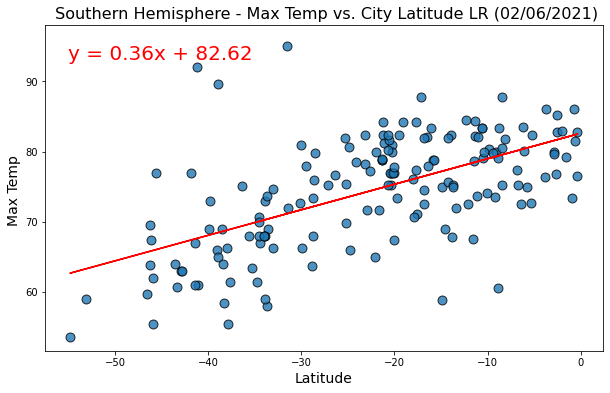

<Figure size 432x288 with 0 Axes>

In [22]:
#plotting scatter Southern Hemisphere - Max Temp vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_ST = f" Southern Hemisphere - Max Temp vs. City Latitude LR ({date})"
ylabel_ST = "Max Temp "

#Set ylim minimum
ymin_ST = 2
ymax_ST = 3

#set annotation limit
lmin_ST =-55
lmax_ST =-2

#Call the function for plotting
scatterplot_SH_Temp =  LR_Scatterplot(x_axis_South, 
                                      y_axis_South , 
                                      regress_values_ST, 
                                      line_eq_ST,
                                      title_ST, 
                                      ylabel_ST, 
                                      ymin_ST, ymax_ST,
                                      lmin_ST , lmax_ST )  

#Save as png file
plt.savefig("Images/southHem_LatVsTemp_LR.png")

#### Analysis : The r-value: 0.41
                   - Shows that there is a moderate positive correlation between Temperature and Latitude on the 
                     Southern Hemisphere
                   - LR model is accounting for 41% of the data which can be seen in the plot.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
# Find X_Axis and Y_Axis values
x_axis_NH_Humid = Northern_hemisphere_df['Lat']
y_axis_NH_humid = Northern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_N_Humid , line_eq_N_Humid, regress_values_N_Humid= linarequation(x_axis_NH_Humid,y_axis_NH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_N_Humid}')
print(f"The r-value is: {round(rvalue_N_Humid**2,2)}")

Linear R Equation : y = 0.23x + 63.45
The r-value is: 0.05


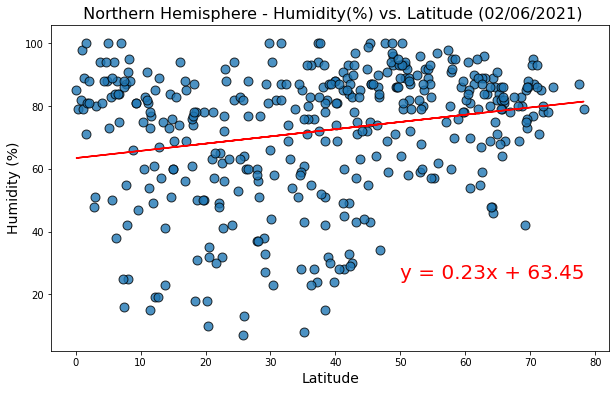

<Figure size 432x288 with 0 Axes>

In [24]:
#plotting scatter Northern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_NHumid = f" Northern Hemisphere - Humidity(%) vs. Latitude ({date})"
ylabel_NHumid = "Humidity (%)"

#Set ylim minimum
ymin_NHumid = 5
ymax_NHumid = 6

#set annotation limit
lmin_NHumid =50
lmax_NHumid =-75

#Call the function for plotting
scatterplot_N_Humid =  LR_Scatterplot(x_axis_NH_Humid, 
                                      y_axis_NH_humid , 
                                      regress_values_N_Humid, 
                                      line_eq_N_Humid,
                                      title_NHumid, 
                                      ylabel_NHumid, 
                                      ymin_NHumid, ymax_NHumid,
                                      lmin_NHumid , lmax_NHumid )
#Save as png file
plt.savefig("Images/NorthHem_LatVsHumidity_LR.png")

#### Analysis : The r-value: 0.18 
                    - Shows that there is a very weak correlation between Humidity and Latitude on the Northerns 
                      Hemisphere accounting for 18% of the data.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
# Find X_Axis and Y_Axis values
x_axis_SH_Humid = Southern_hemisphere_df['Lat']
y_axis_SH_humid = Southern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_S_Humid , line_eq_S_Humid, regress_values_S_Humid= linarequation(x_axis_SH_Humid, y_axis_SH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Humid}')
print(f"The r-value is: {round(rvalue_S_Humid**2,2)}")

Linear R Equation : y = 0.36x + 83.2
The r-value is: 0.08


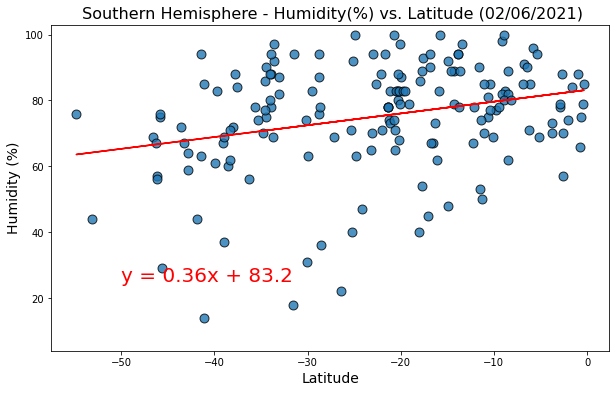

<Figure size 432x288 with 0 Axes>

In [26]:
#plotting scatter Southern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_SHumid = f" Southern Hemisphere - Humidity(%) vs. Latitude ({date})"
ylabel_SHumid = "Humidity (%)"

#Set ylim minimum
ymin_SHumid = 10
ymax_SHumid = 3

#set annotation limit
lmin_SHumid =-50
lmax_SHumid =-75

#Call the function for plotting
scatterplot_S_Humid =  LR_Scatterplot(x_axis_SH_Humid, 
                                      y_axis_SH_humid , 
                                      regress_values_S_Humid, 
                                      line_eq_S_Humid,
                                      title_SHumid, 
                                      ylabel_SHumid, 
                                      ymin_SHumid, ymax_SHumid,
                                      lmin_SHumid , lmax_SHumid )
#Save as png file
plt.savefig("Images/southHem_LatVsHumidity_LR.png")

#### Analysis : The r-value: 0.01 - Shows that there is a very weak or almost no correlation between Humidity and Latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# Find X_Axis and Y_Axis values
x_axis_NH_cloud = Northern_hemisphere_df['Lat']
y_axis_NH_cloud = Northern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_N_cloud , line_eq_N_cloud, regress_values_N_cloud= linarequation(x_axis_NH_cloud,y_axis_NH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_N_cloud}')
print(f"The r-value is: {round(rvalue_N_cloud**2,2)}")

Linear R Equation : y = 0.5x + 28.64
The r-value is: 0.06


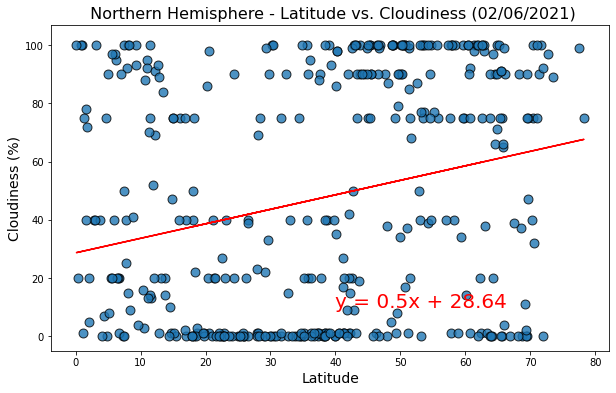

<Figure size 432x288 with 0 Axes>

In [28]:
#plotting scatter Northern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Ncloud = f" Northern Hemisphere - Latitude vs. Cloudiness ({date})"
ylabel_Ncloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Ncloud = 5
ymax_Ncloud = 7

#set annotation limit
lmin_Ncloud = 40
lmax_Ncloud =-90

#Call the function for plotting
scatterplot_N_cloud =  LR_Scatterplot(x_axis_NH_cloud, 
                                      y_axis_NH_cloud , 
                                      regress_values_N_cloud, 
                                      line_eq_N_cloud,
                                      title_Ncloud, 
                                      ylabel_Ncloud, 
                                      ymin_Ncloud, ymax_Ncloud,
                                      lmin_Ncloud , lmax_Ncloud )
#Save as png file
plt.savefig("Images/NorthHem_LatVsCloudiness_LR.png")

#### Analysis : The r-value: 0.08
                   - Shows that there is a very weak correlation between Cloudiness and Latitude acoounting for 8% 
                     of the data

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
# Find X_Axis and Y_Axis values
x_axis_SH_cloud = Southern_hemisphere_df['Lat']
y_axis_SH_cloud = Southern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_S_cloud , line_eq_S_cloud, regress_values_S_cloud = linarequation(x_axis_SH_cloud, y_axis_SH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_S_cloud}')
print(f"The r-value is: {round(rvalue_S_cloud**2,2)}")

Linear R Equation : y = 0.66x + 68.06
The r-value is: 0.05


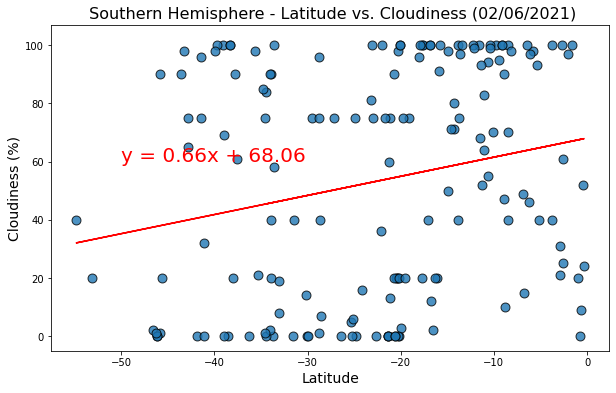

<Figure size 432x288 with 0 Axes>

In [30]:
#plotting scatter Southern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Scloud = f" Southern Hemisphere - Latitude vs. Cloudiness ({date})"
ylabel_Scloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Scloud = 5
ymax_Scloud = 7

#set annotation limit
lmin_Scloud = -50
lmax_Scloud =-40

#Call the function for plotting
scatterplot_S_cloud =  LR_Scatterplot(x_axis_SH_cloud, 
                                      y_axis_SH_cloud , 
                                      regress_values_S_cloud, 
                                      line_eq_S_cloud,
                                      title_Scloud, 
                                      ylabel_Scloud, 
                                      ymin_Scloud, ymax_Scloud,
                                      lmin_Scloud , lmax_Scloud )
#Save as png file
plt.savefig("Images/southHem_LatVsCloudiness_LR.png")

#### Analysis : The r-value: 0.09 
                  - Shows that there is a very weak correlation between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [31]:
# Find X_Axis and Y_Axis values
x_axis_NH_wind = Northern_hemisphere_df['Lat']
y_axis_NH_wind= Northern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_N_wind , line_eq_N_wind, regress_values_N_wind= linarequation(x_axis_NH_wind,y_axis_NH_wind)

#Print values to display
print(f'Linear R Equation : {line_eq_N_wind}')
print(f"The r-value is: {round(rvalue_N_wind**2,4)}")

Linear R Equation : y = 0.04x + 7.49
The r-value is: 0.0163


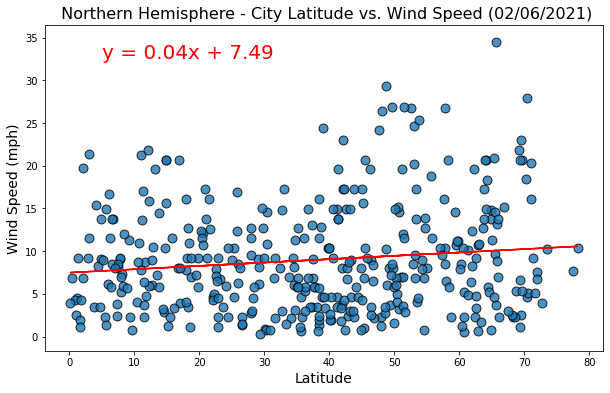

<Figure size 432x288 with 0 Axes>

In [32]:
#plotting scatter Northern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Nwind = f" Northern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Nwind = "Wind Speed (mph)"

#Set ylim minimum
ymin_Nwind = 2
ymax_Nwind = 2

#set annotation limit
lmin_Nwind = 5
lmax_Nwind =-2

#Call the function for plotting
scatterplot_N_wind =  LR_Scatterplot(x_axis_NH_wind, 
                                      y_axis_NH_wind , 
                                      regress_values_N_wind, 
                                      line_eq_N_wind,
                                      title_Nwind, 
                                      ylabel_Nwind, 
                                      ymin_Nwind, ymax_Nwind,
                                      lmin_Nwind , lmax_Nwind )
#Save as png file
plt.savefig("Images/NorthHem_LatVsWindSpeed_LR.png")

#### Analysis : The r-value: 0.0155 - Shows that ther is a very weak or almost no correlation between windspeed and Latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Find X_Axis and Y_Axis values
x_axis_SH_Wind = Southern_hemisphere_df['Lat']
y_axis_SH_Wind = Southern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_S_Wind , line_eq_S_Wind, regress_values_S_Wind = linarequation(x_axis_SH_Wind, y_axis_SH_Wind)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Wind}')
print(f"The r-value is: {round(rvalue_S_Wind**2,3)}")

Linear R Equation : y = -0.07x + 5.54
The r-value is: 0.036


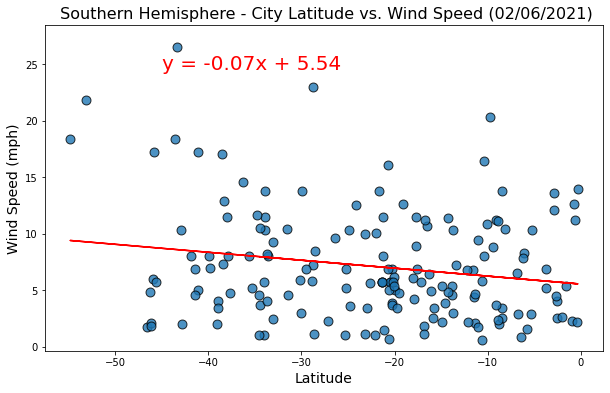

<Figure size 432x288 with 0 Axes>

In [34]:
#plotting scatter Southern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Swind = f" Southern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Swind = "Wind Speed (mph)"

#Set ylim minimum 
ymin_Swind = 1
ymax_Swind = 2

#set annotation limit to display LR line
lmin_Swind = -45
lmax_Swind =-2

#Call the function for plotting
scatterplot_S_wind =  LR_Scatterplot(x_axis_SH_Wind, 
                                      y_axis_SH_Wind , 
                                      regress_values_S_Wind, 
                                      line_eq_S_Wind,
                                      title_Swind, 
                                      ylabel_Swind, 
                                      ymin_Swind, ymax_Swind,
                                      lmin_Swind , lmax_Swind )
#Save as png file
plt.savefig("Images/SouthHem_LatVsWindSpeed_LR.png")

#### Analysis : The r-value : 0.01 - Shows that there is correlation between latitude and windspeed.